In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import bm3d
from pathlib import Path
from skimage import io, img_as_float
import os
from collections import defaultdict

Figures for denoising subsection

In [15]:
test_image_denoise = r"D:\VIP Cup\datasets\ICIP training data\0\RawDataQA (25)\RawDataQA25 (172).tiff"
test_image_pipeline = r"D:\VIP Cup\datasets\ICIP_test_data_final\RawDataQA (10)\(157).tif"
output_dir = r"D:\VIP Cup\figures_for_report"

In [3]:
def bm3d_denoise(noisy_image, npsd_sigma):

    noisy_oct = img_as_float(io.imread(noisy_image))
    sigma = npsd_sigma
    bm3d_denoised = bm3d.bm3d(noisy_oct, sigma_psd=sigma, stage_arg=bm3d.BM3DStages.ALL_STAGES)
    return bm3d_denoised

In [4]:
import numpy as np
from numpy.linalg import svd
from PIL import Image
import math

def get_svd_image_from_array(A):

    # Remember image size
    n = len(A)

    # Take SVD
    U, S, V = svd(A)

    threshold = 4/np.sqrt(3)
    filter = (S > threshold)*1 
    filtered_S = np.multiply(S, filter)

    # Initialize blank image
    final_img = np.zeros((n, n))
        
    for i in range(n):
        matrix = S[i]*np.outer(U[:,i],V[i])
        final_img += matrix
    
    return final_img

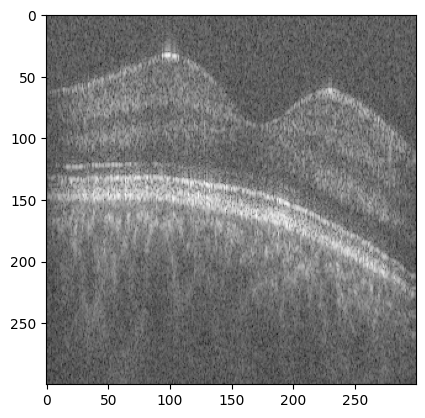

In [8]:
raw_image_denoise = img_as_float(io.imread(test_image_denoise))
plt.imshow(raw_image_denoise, cmap='gray')
plt.imsave(os.path.join(output_dir, "raw_image.png"), raw_image_denoise, cmap='gray')

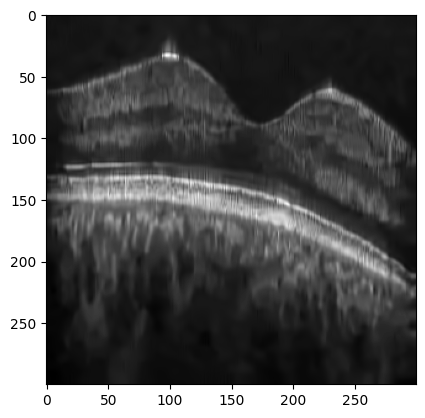

In [6]:
bm3d_image = bm3d_denoise(test_image_denoise,0.083)
plt.imshow(bm3d_image, cmap='gray') 
plt.imsave(os.path.join(output_dir, "bm3d_image.png"), bm3d_image, cmap='gray')

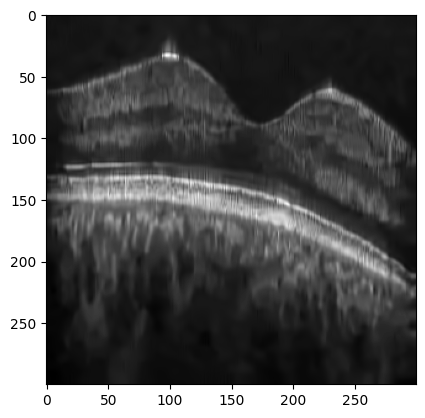

In [7]:
svd_image = get_svd_image_from_array(bm3d_image)
plt.imshow(svd_image, cmap='gray')
plt.imsave(os.path.join(output_dir, "svd_image.png"), svd_image, cmap='gray')

Fig for the overall pipeline

In [9]:
import cv2
import numpy as np

def get_bicubic_upsampled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)

def get_bilinear_upsampled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

def get_nearest_upsampled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)

def get_lanczos_upsampled_array(image: np.array, width: int = 300, height: int = 300) -> np.array:
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_LANCZOS4)


Super resolution

For Pypeline,

In [21]:
test_image_pipeline = "D:/VIP Cup/datasets/ICIP_test_data_final/RawDataQA (17)/(24).tif"
output_dir_pipeline = os.path.join(output_dir,'pipline')

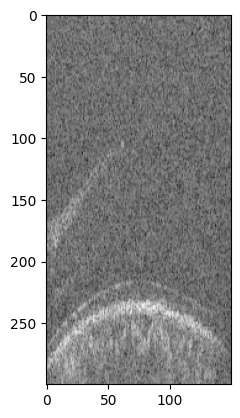

In [22]:
pipeline_img = img_as_float(io.imread(test_image_pipeline))
plt.imshow(pipeline_img, cmap='gray')
plt.imsave(os.path.join(output_dir, "raw_image.png"), raw_image_denoise, cmap='gray')

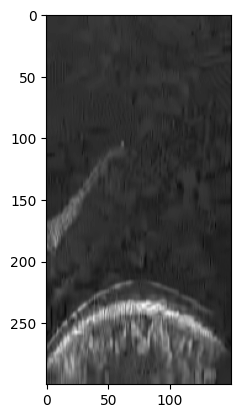

In [23]:

bm3d_pipeline = bm3d_denoise(test_image_pipeline, 0.083)
plt.imsave(os.path.join(output_dir_pipeline, 'svd.png'), bm3d_pipeline_more, cmap='gray')
plt.imshow(bm3d_pipeline  , cmap='gray')